# **Estudo Dirigido 9 - Momentos**

**Aluno:** André Paiva Conrado Rodrigues

**Matéria:** ENGG64 - Visão Computacional - 2023.2

## 1 - Importação de dependências e configurações

Para esta atividade é utilizada a `machinevisiontoolbox` do Peter Corke e a biblioteca `matplotlib` para exibição de imagens, além do `numpy` para operações matemáticas.

In [1]:
import numpy as np
from machinevisiontoolbox.base import *
from machinevisiontoolbox import *
from spatialmath.base import *
from spatialmath import *
from matplotlib import pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## 2 - Abrindo a imagem

Primeiramente, é importada a imagem e é feita a binarização.

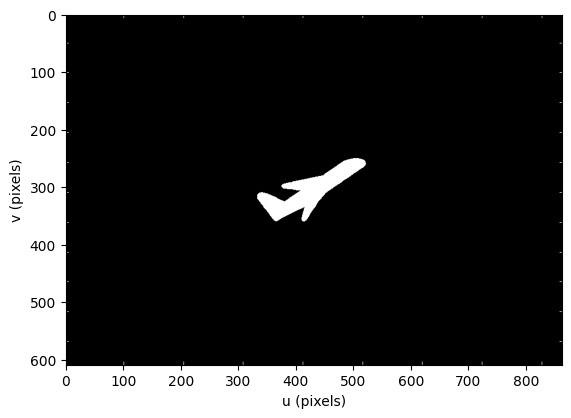

In [2]:
# Leitura da imagem original
aviao = Image.Read("aviao_ed.png", dtype='float')
aviao_bin = (aviao.colorspace("L*a*b*").plane("L*:") >= 0.5)
aviao_bin.disp()

## 3 - Área do objeto

A área do objeto pode ser obtida por meio do momento $m_{00}$.

In [3]:
area = aviao_bin.mpq(0, 0)
print(area)

7275


## 4 - Centroide do objeto

O centroide do objeto, em coordenadas $(u_{c}, v_{c})$ pode ser calculada do seguinte modo:

$$u_{c} = \dfrac{m_{10}}{m_{00}}$$
$$v_{c} = \dfrac{m_{01}}{m_{00}}$$

In [4]:
uc = aviao_bin.mpq(1, 0) / area
vc = aviao_bin.mpq(0, 1) / area
print(f'uc = {uc}; vc = {vc}')

uc = 423.200412371134; vc = 306.1018556701031


## 5 - Momento central e Matriz de Inércia

Os momentos centrais $\mu_{pq}$ são calculados em relação aos momentos $m_{pq}$ do seguinte modo:

$$\mu_{10} = 0$$
$$\mu_{01} = 0$$
$$\mu_{20} = m_{20} - \dfrac{m^{2}_{10}}{m_{00}}$$
$$\mu_{02} = m_{02} - \dfrac{m^{2}_{01}}{m_{00}}$$
$$\mu_{11} = m_{11} - \dfrac{m_{10}m_{01}}{m_{00}}$$

A matriz de inércia é dada por:

$$\boldsymbol{J} = \begin{pmatrix} 
  \mu_{20} & \mu_{11}\\ 
  \mu_{11} & \mu_{02} 
\end{pmatrix}$$

In [5]:
mu_20 = aviao_bin.upq(2, 0)
mu_02 = aviao_bin.upq(0, 2)
mu_11 = aviao_bin.upq(1, 1)

J = np.array([[mu_20, mu_11],[mu_11, mu_02]])
print(J)

[[43596275.79876288 -7179994.50556701]
 [-7179994.50556701 17843053.52494845]]


## 6 - Elipse equivalente

O elipse pode ser definido pelo seu raio maior e raio menor.

In [10]:
lmbda, eigen = np.linalg.eig(J)
max_radius = 2 * np.sqrt(lmbda.max() / area)
min_radius = 2 * np.sqrt(lmbda.min() / area)
aspect_ratio = min_radius / max_radius
print(f'Raio maior: {max_radius}\nRaio menor: {min_radius}\nRazão de aspecto: {aspect_ratio}')

Raio maior: 158.10350172341606
Raio menor: 93.72490216074145
Razão de aspecto: 0.5928072505611066


## 7 - Orientação

A orientação define o ângulo de inclinação do elipse.

In [13]:
z = eigen[:, np.argmax(lmbda)]
theta = np.rad2deg(np.arctan2(z[1], z[0]))
print(f"Orientação: {theta:.2f}º")

Orientação: -14.57º


## 8 - Centroide e elipse plotados na imagem

Podemos notar que o centroide da imagem está levemente deslocado para baixo do avião, em decorrência da maior concentração de pixels do blob estar localizada na região embaixo à esquerda.

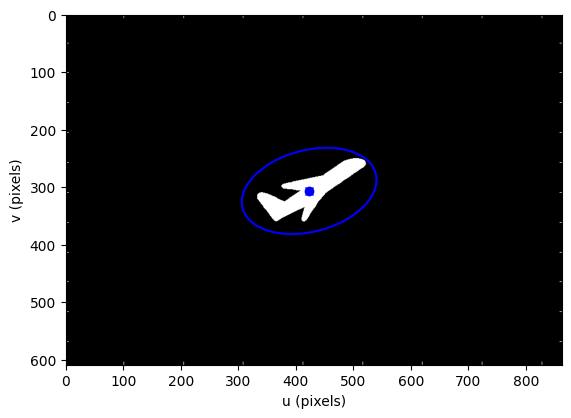

In [14]:
with plt.ioff():
    aviao_bin.disp()
    plot_ellipse(2.3 * J / area, centre=(uc, vc), inverted=True, color="blue")
    plot_point((uc, vc), ["bo", "bx"])
    plt.show()